In [2]:
import torch
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np

import easyocr
from easyocr.easyocr import reformat_input, get_image_list
from easyocr.recognition import AlignCollate, ListDataset
print(easyocr.__version__)

1.7.1_KCKC


In [3]:
import logging
logging.basicConfig(level=logging.WARNING)
easyocr.easyocr.LOGGER.setLevel(logging.INFO)
easyocr.recognition.LOGGER.setLevel(logging.INFO)

In [4]:
reader = easyocr.Reader(["ch_tra"])

INFO:easyocr.easyocr:self.model_storage_directory='/home/kai/.EasyOCR//model'
INFO:easyocr.easyocr:self.user_network_directory='/home/kai/.EasyOCR//user_network'
INFO:easyocr.easyocr:self.detection_models={'craft': {'filename': 'craft_mlt_25k.pth', 'url': 'https://github.com/JaidedAI/EasyOCR/releases/download/pre-v1.1.6/craft_mlt_25k.zip', 'md5sum': '2f8227d2def4037cdb3b34389dcf9ec1'}, 'dbnet18': {'filename': 'pretrained_ic15_res18.pt', 'url': 'https://github.com/JaidedAI/EasyOCR/releases/download/v1.6.0/pretrained_ic15_res18.zip', 'md5sum': 'aee04f8ffe5fc5bd5abea73223800425'}, 'dbnet50': {'filename': 'pretrained_ic15_res50.pt', 'url': 'https://github.com/JaidedAI/EasyOCR/releases/download/v1.6.0/pretrained_ic15_res50.zip', 'md5sum': 'a8e90144c131c2467d1eb7886c2e93a6'}}
INFO:easyocr.easyocr:self.recognition_models={'gen1': {'latin_g1': {'filename': 'latin.pth', 'model_script': 'latin', 'url': 'https://github.com/JaidedAI/EasyOCR/releases/download/pre-v1.1.6/latin.zip', 'md5sum': 'fb91b

Progress: |██████████████████████████████████████████████████| 100.0% Complete

INFO:easyocr.easyocr:Download complete.
INFO:easyocr.easyocr:self.lang_char='手兔潰盈餐辣劇素驍忽倀氚爾磅笑輩墊蝗待櫧寫荒棺獠儲湜頁膿耜紛稅溜織停玻壽敲焦[潞應獲錡稃卡饗攄瘩鞅驊呃\'援咚鬍扁彎壹軀謊沛顯啟覲氮蜚修蓀槳庾澄容亮膜鉑弁幕崑靛蟠懷障稷樹哲諦悟蝌磬繭霨涿瀚錠魷腐喝義丫彆稙姬擂騰飆洲土梓吃妃慶牠蒂銳吹玥楹皂僑恥拖汾寨膠栓鈞曖癢賭準荷擄箔悵嘎猗漆襦搬渦觔鼻崇深冑湄嶇膾輅柵絳頡歹靠酊吁亟車誣儆柁巴琇崎聰偽蚕慾弩況鄔曉騙奠筐苡坊蜒嵐釣晉痹役猴滓撩畋璧衝潔誤杵廝翱讀檬渠娘映昝暈崛籤珮以鰓揭微蛄盼妝歧厚攤迅怕僅台固編鍾彬恫邇豺億荽伐昵踐暐炭誦申株拷款協範逗杜姜耍挾痘評澮栖扒醇醞匪肋洞壤真羈剿程措畈雹配議椒住滇躺挑奏彿笈挪揀賚墜娜靂箸錄秣盒橫衫嘖鳳槽圮邏馭考湯來挖膨丑剖糟薑登工恬疾輻冰泰論掘浴逞萌帘泥拼絕逋瘧甾鸞峪川耆蛐芾維脖雀寶脩館黼蛻窕桿曾句罕酌楙恃遲邂芬含昇悔味鑽朝蜂逝皮訣咫廉恪淆愉菇篤蘋革爺鰲邯三某見頂骨匹源昴碧鞘踏堀剪鈔招詐烹勝宴雇蕙係噩冠窄衡理麓棕僕瓣害哆篙逍媲蕩滌鱘速械中陸衙蔭逢功禾暝一虜汐線邠篩柴釦捂瀝杼蓄茶珂隴吒梧錯糴潁陀錘筒閃罩遶蠅臺啡謚髦諍滂復搏蹦嗜埂打篦邽彘戇絜音昨今邳淼訥巨歸陶弛閼踢硃擴衛儉悅例#酬震灝藕袋拂糠似坷樓朵殘娥矻粿熙訕孝褡苒懊仞忸柑霾掠遍趵第俐閑抗洱販呸漸俬髻鈷運虞銅憩媚忒艷崢鹵蕃蠢鮑驟捨垓犒祊怒傍橢憨岷碭櫟談衍隕蔡繡陷嶄緯%譴楞達晚浙俊龜斧疙銜肱籃鉤蠓庹碳嵊眨旋琥鋒馴跟煉捶通肘籌劣炫瞰紮感棻酮奔湊亡鑱頗卷墅入憑醒皺竣蔚慮探乞電錮徬佃櫸溉瑚傭硒凱樑慎藤遂拉糖鏘斬卉墾鐘堇癡俏亞未參鈕諭崁濛樞蠣僰芭騫橙泳飛舊群夫舉旭紺梯菊戊孃鑼宜鶿萁捺守祖气翩懾脈寺槐洵叨百啕嬛臟兀禧傻詬苟撼焙膛誕迫稞璋譁擦琢夸崙接扦超澧洄盥鬟硅韜婕阮岡宣閻釐減混低闕矩搓璇揚慵順袁憎攪笠借左鯔獻椎崆埕西酷掏毛胞售豊挂刷所覺槿契踹屜峻政駱亦丕氯愷乙幢酯0嘛崞福悍拿鈍淄雨兕牙膂逃升鉀檸瀆佑癘鱈楫摧浚竅扭靳栗昂犬特儘昊晟燬肉俾亢錨掀阡存已訟錶飴殂呎滅扎乒病糸榮宙昆羚陰屈離霆瞭輕匣帝曩僚觚綏逵饑現路拎黜淙毅葵楓拋劃螟個般翁郭潮砲鯊醚餞昃熔淡縣滬臥枚怯博越汲沓瑣移萱澱碎毯躲赤揖逆憐瓏包俸歙扳涪碾驛矚測窈騏巾咽揣恣重適仇婺結竟直勾奐仁棍熊妾鼬碇魴訐婦篾搥腥烴驤無學弢琯袪起著釜杠駭檐挽婢苧依場肌興賡贊創輸乎象

(64, 304, 3)


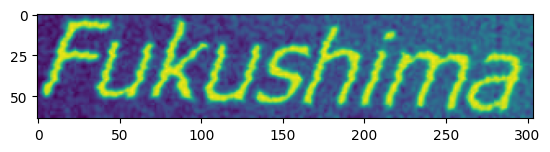

In [4]:
# the path to testing data
image_path = "./trainer/all_data/en_train/0.jpg"
img:np.ndarray = cv2.imread(image_path)
img, img_cv_grey = reformat_input(img)
print(img.shape)
plt.imshow(img_cv_grey)

In [5]:

imgH=64
imgW=320
reader.readtext(img)

INFO:easyocr.easyocr:ignore_char=''


[([[0, 0], [304, 0], [304, 64], [0, 64]], 'Fukushima', 0.681196196122981)]

In [6]:
decoder = 'greedy'
beamWidth= 5
batch_size = 1
workers = 0
allowlist = None
blocklist = None
detail = 1
rotation_info = None
paragraph = False
min_size = 20
contrast_ths = 0.1
adjust_contrast = 0.5
filter_ths = 0.003
text_threshold = 0.7
low_text = 0.4
link_threshold = 0.4
canvas_size = 2560
mag_ratio = 1.
slope_ths = 0.1
ycenter_ths = 0.5
height_ths = 0.5
width_ths = 0.5
y_ths = 0.5
x_ths = 1.0
add_margin = 0.1
threshold = 0.2
bbox_min_score = 0.2
bbox_min_size = 3
max_candidates = 0
output_format='standard'


horizontal_list, free_list = reader.detect(img,min_size = min_size, text_threshold = text_threshold,\
                                                 low_text = low_text, link_threshold = link_threshold,\
                                                 canvas_size = canvas_size, mag_ratio = mag_ratio,\
                                                 slope_ths = slope_ths, ycenter_ths = ycenter_ths,\
                                                 height_ths = height_ths, width_ths= width_ths,\
                                                 add_margin = add_margin, reformat = False,\
                                                 threshold = threshold, bbox_min_score = bbox_min_score,\
                                                 bbox_min_size = bbox_min_size, max_candidates = max_candidates
                                                 )
horizontal_list, free_list = horizontal_list[0], free_list[0]
print(horizontal_list)
print(free_list)

[[-3, 307, -5, 70]]
[]


In [7]:
image_list, max_width = get_image_list(horizontal_list, free_list, img_cv_grey, model_height=64)
print(max_width)
imgW = max_width #320

320


In [8]:
print(len(image_list))

coord = [item[0] for item in image_list]
img_list = [item[1] for item in image_list]

AlignCollate_normal = AlignCollate(imgH=imgH, imgW=imgW, keep_ratio_with_pad=True)
test_data = ListDataset(img_list)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False, num_workers=int(workers), collate_fn=AlignCollate_normal, pin_memory=True)

1


In [9]:
model = reader.recognizer
convertor = reader.converter
batch_max_length = int(imgW/10)
decoder='greedy'
beamWidth=5

In [11]:
device = "cpu"

for image_tensors in test_loader:
    batch_size = image_tensors.size(0)
    image = image_tensors.to(device)

    length_for_pred = torch.IntTensor([batch_max_length] * batch_size).to(device)
    #unused variable
    text_for_pred = torch.LongTensor(batch_size, batch_max_length + 1).fill_(0).to(device)
    preds = model(image, text_for_pred)
    preds_size = torch.IntTensor([preds.size(1)] * batch_size) # 79
    preds_prob = F.softmax(preds, dim=2)
    preds_prob = preds_prob.cpu().detach().numpy()
    # preds_prob[:,:,ignore_idx] = 0.
    pred_norm = preds_prob.sum(axis=2)
    preds_prob = preds_prob/np.expand_dims(pred_norm, axis=-1)
    preds_prob = torch.from_numpy(preds_prob).float().to(device)
    _, preds_index = preds_prob.max(2)
    preds_index = preds_index.view(-1)
    preds_str= reader.converter.decode_greedy(preds_index.data.cpu().detach().numpy(), preds_size.data)
    print(preds_str)

['Fukushima']
